# Now Insurance Loss Runs #
## automatic extraction of relevant information in loss reports from pdf files ##

In [106]:
## load depedencies 
import lossrun
import Lossrun_models # ORM models
import matplotlib.pyplot as plt

## Pre-processing ##

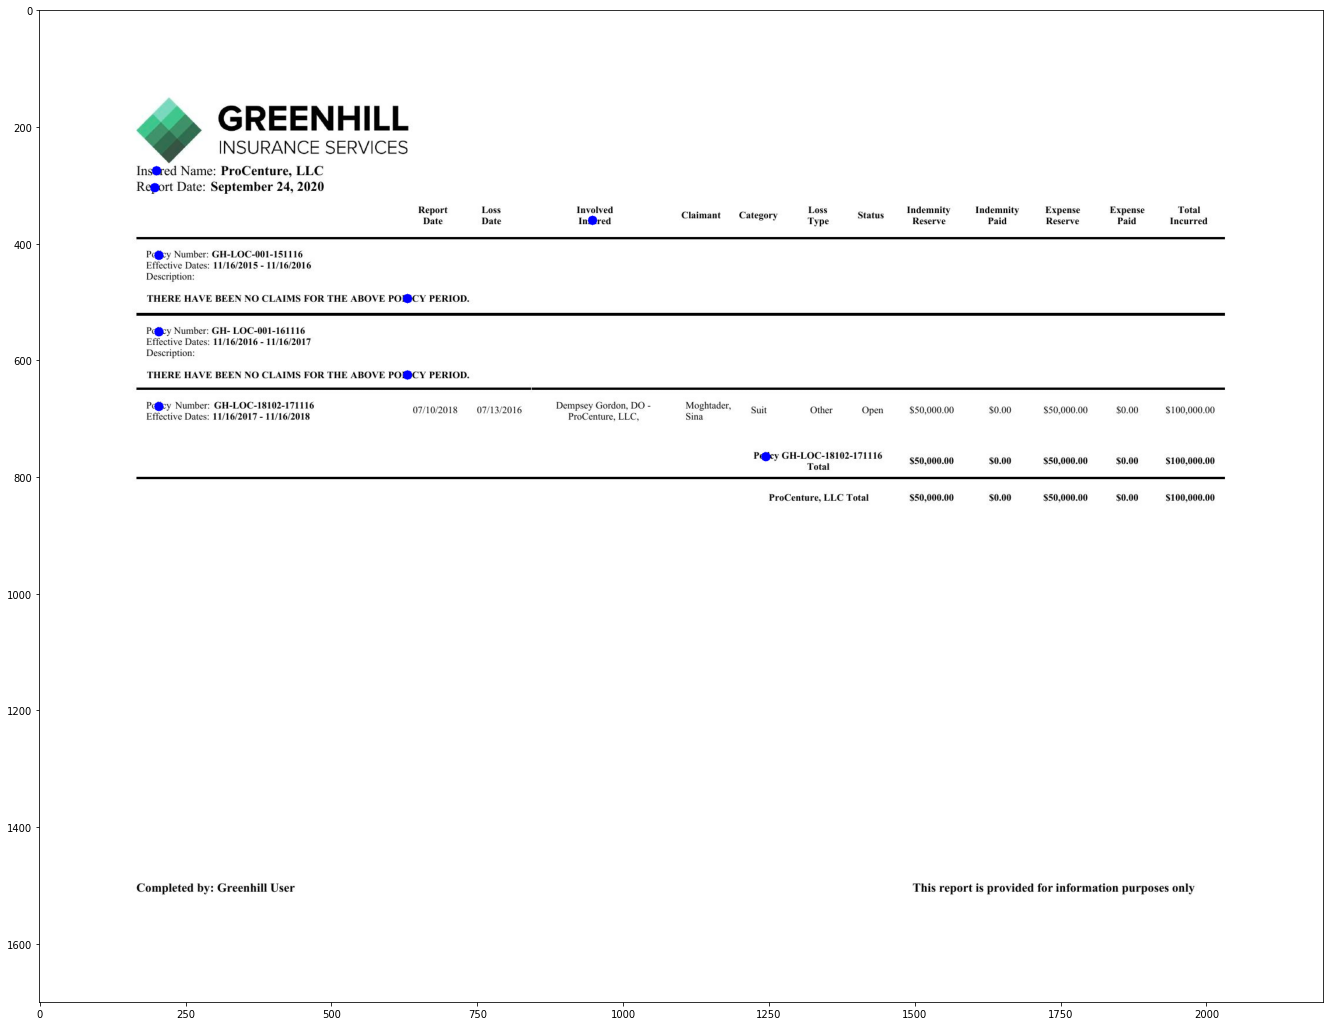

In [107]:
## Select file


# pdf raw file no ext 
#__________________________________________
#pdf_file = 'B00319X_Dr. Majoch loss run MAG-YES0'
#___________________________________________

#__________________________________________
#pdf_file = 'AHC-0000343 loss runs PIO-YES0'
#___________________________________________
#....................................................

#__________________________________________
pdf_file = 'GH Lloyds Loss Runs0'
#___________________________________________


# topic files
topic_file = './data/configuration/config_topics_beta.ino'

# Pre proc data
txt_dict, topics, image, image_c = lossrun.pre_proc(pdf_file, 'data', topic_file)

# vizualizate data
plt.figure(figsize=(23,20))
# Orignial data
plt.imshow(image)
# Orignial data

## Spatial relation filter ##

In [108]:
## load topics

# search topics in data pre - proc
spatial_filter = lossrun.spatial_filter(txt_dict, topics)
spatial_filter_topics = len(spatial_filter)

for topic in range(spatial_filter_topics):

    string = ' '.join(spatial_filter[topic])
    string = re.sub('\s+',' ',string)
    print('SEARCHING TOPIC: ' + topics[topic][0])
    print('In: ' + string )
    print('.'*100 + '\n')

SEARCHING TOPIC: policy_num
In:  Effective Description THERE Policy Effective Description: THERE Policy Effective Completed Number: GH-LOC-001-151116
....................................................................................................

SEARCHING TOPIC: policy_num
In:  Effective Description: THERE Policy Effective Completed Number: GH- LOC-001-161116
....................................................................................................

SEARCHING TOPIC: policy_num
In:  Effective Completed Number: GH-LOC-18102-171116 Doig Dempsey Gordon, DO - Moghtader, 66 6 $5 6 - 07/10/2018 07/13/2016 Sine Suit Other Open $50,000.00 $0.00 $50,000.00 $0.00 $100,000.00
....................................................................................................

SEARCHING TOPIC: policy_num
In: POLICY 07/10/2018 PERIOD.
....................................................................................................

SEARCHING TOPIC: policy_num
In: 07/10/2018 PERIOD

### Name entity recognition ##

In [ ]:
## LOAD NAME MODEL 
import spacy 
nlp = spacy.load('./data/results/models/')

In [109]:
import re
from configobj import ConfigObj
import string as String
printable = set(String.printable)
# topic rules
ner_rules = ConfigObj('./data/configuration/config_rules_beta.ino')

_temp = []
#
for i in range(len(spatial_filter)):

    string = ' '.join(spatial_filter[:][i])
    string = re.sub('\s+',' ',string)
    
    
    # remove non printalbes elemts
    string = ''.join(filter(lambda x: x in printable, string))
    #print (string)
    doc = nlp(string)

    for ent in doc.ents:
        print('It will be added to data base : ')
        print(ent.text + ' in ' + ent.label_)
        print('\n.................')


It will be added to data base : 
GH-LOC-001-151116 in ALPHANUM

.................
It will be added to data base : 
GH- LOC-001-161116 in ALPHANUM

.................
It will be added to data base : 
GH-LOC-18102-171116 in ALPHANUM

.................
It will be added to data base : 
GH-LOC-18102-171116 in ALPHANUM

.................
It will be added to data base : 
ProCenture, LLC in ORGED

.................
It will be added to data base : 
September 24, 2020 in DATE

.................


In [ ]:
def encuentra(tupleT,busqueda):
    for i in range (len(tupleT)):
        if tupleT[i][1] == busqueda:
            return i

In [ ]:
_temp = list(dict.fromkeys(_temp))
#print(len(_temp))
#print(_temp)
print(encuentra(_temp,'PERSON'))

## DATA BASE INSERTION ##

In [ ]:
#Sinlge function for database insertion
Lossrun_models.registerRecord(timeDimDay = 12,
                              timeDimMonth = 9,
                              timeDimYear = 20,
                              policyDimStatus = "Open", 
                              reportGeneratorDimName = _temp[encuentra(_temp,'ORG')][0], 
                              insuredDimName = _temp[encuentra(_temp,'ORG')][0],
                              insurerDimName = _temp[encuentra(_temp,'PERSON')][0], 
                              statusName = "Open", 
                              lossRunReportDimDate = datetime.datetime.now()) 

## Contextual analysis

In [ ]:
# Call the model 
model = lossrun.load_context_model()

In [ ]:
model.most_similar('policy')

In [ ]:
similar = []
try:
    similar.append(model.most_similar_to_given('ORG', txt_dict['text']))
except: 
    similar.append('0')

similar

In [ ]:
# test cell ignore it
###############################


# check topic
_topic = 'Paid'

relates_words_index = []

rate_relation =  0.1 # where grammar  correlation goes to -1 to 1 

for i in txt_dict['text']:

    try:
        relates_words_index.append(model.similarity(_topic, i))
    except:
        relates_words_index.append(0)
#model.similarity()
for index, relate_rate in enumerate(relates_words_index):

    if (relate_rate > .2):
        #print(index)
        print(txt_dict['text'][index])